In [141]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lightgbm as lgbm
from sklearn.metrics import log_loss
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import shutil
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import xlearn as xl
from sklearn import tree
import time

In [147]:
df2 = pd.read_csv('data/train/train2.csv')
df2 = df2[~pd.isnull(df2.is_trade)]
item_category_list_unique = list(np.unique(df2.item_category_list))
df2.item_category_list.replace(item_category_list_unique, list(np.arange(len(item_category_list_unique))), inplace=True)

KeyboardInterrupt: 

In [142]:
def runlevel1(features, label, df, Ttrain, Ttest, clf,verbose = True):
    starttime = time.time()
    X = df
    y = df[label]
    Loss = []
#    T = X.context_timestamp <= '2018-09-23 23:59:59'
    X_train, X_test = X[Ttrain], X[Ttest]
    X_train, X_test = X_train[features], X_test[features]
    y_train, y_test = y[Ttrain], y[Ttest]
    clf.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=verbose,early_stopping_rounds=200)
    predict = clf.predict_proba(X_test)[:,1]
    logloss = log_loss(y_test, predict)
    print(logloss)
#    for i in np.linspace(0.0003, 0.0004, 1000):
#        logloss = log_loss(y_test, predict-i)
#        print('{}: {}'.format(i, logloss))
    print(time.time()-starttime)
    return clf

In [39]:
def runlevel2(X, label, df, Ttrain, Ttest, clf,verbose = True):
    y = df[label]
    Loss = []
#    T = X.context_timestamp <= '2018-09-23 23:59:59'
    X_train, X_test = X[Ttrain], X[Ttest]
    y_train, y_test = y[Ttrain], y[Ttest]
    clf.fit(X_train,y_train) #, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=verbose,early_stopping_rounds=200)
    predict = clf.predict_proba(X_test)[:,1]
    logloss = log_loss(y_test, predict)
    print(logloss)
#    for i in np.linspace(0.0003, 0.0004, 1000):
#        logloss = log_loss(y_test, predict-i)
#        print('{}: {}'.format(i, logloss))
    return clf

np.unique(df2.day) #array([18, 19, 20, 21, 22, 23, 24])

[1]	training's binary_logloss: 0.648025	valid_1's binary_logloss: 0.647791
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.607201	valid_1's binary_logloss: 0.606753
[3]	training's binary_logloss: 0.570105	valid_1's binary_logloss: 0.569448
[4]	training's binary_logloss: 0.536266	valid_1's binary_logloss: 0.535405
[5]	training's binary_logloss: 0.505299	valid_1's binary_logloss: 0.504246
[6]	training's binary_logloss: 0.476876	valid_1's binary_logloss: 0.475636
[7]	training's binary_logloss: 0.45072	valid_1's binary_logloss: 0.449296
[8]	training's binary_logloss: 0.426599	valid_1's binary_logloss: 0.425005
[9]	training's binary_logloss: 0.404308	valid_1's binary_logloss: 0.402548
[10]	training's binary_logloss: 0.383672	valid_1's binary_logloss: 0.381754
[11]	training's binary_logloss: 0.364536	valid_1's binary_logloss: 0.362466
[12]	training's binary_logloss: 0.346768	valid_1's binary_logloss: 0.344548
[13]	training's binary_logloss: 0.3

[107]	training's binary_logloss: 0.0896702	valid_1's binary_logloss: 0.0817775
[108]	training's binary_logloss: 0.0896225	valid_1's binary_logloss: 0.0817298
[109]	training's binary_logloss: 0.0895656	valid_1's binary_logloss: 0.0816711
[110]	training's binary_logloss: 0.0895117	valid_1's binary_logloss: 0.0816187
[111]	training's binary_logloss: 0.0894655	valid_1's binary_logloss: 0.0815674
[112]	training's binary_logloss: 0.0894281	valid_1's binary_logloss: 0.0815378
[113]	training's binary_logloss: 0.0893803	valid_1's binary_logloss: 0.0814892
[114]	training's binary_logloss: 0.0893384	valid_1's binary_logloss: 0.0814424
[115]	training's binary_logloss: 0.0893007	valid_1's binary_logloss: 0.0813929
[116]	training's binary_logloss: 0.0892559	valid_1's binary_logloss: 0.0813444
[117]	training's binary_logloss: 0.0892184	valid_1's binary_logloss: 0.081306
[118]	training's binary_logloss: 0.0891862	valid_1's binary_logloss: 0.081275
[119]	training's binary_logloss: 0.0891531	valid_1's b

[215]	training's binary_logloss: 0.087349	valid_1's binary_logloss: 0.0798255
[216]	training's binary_logloss: 0.0873415	valid_1's binary_logloss: 0.0798281
[217]	training's binary_logloss: 0.0873324	valid_1's binary_logloss: 0.0798216
[218]	training's binary_logloss: 0.0873241	valid_1's binary_logloss: 0.0798136
[219]	training's binary_logloss: 0.0873164	valid_1's binary_logloss: 0.0798054
[220]	training's binary_logloss: 0.0873082	valid_1's binary_logloss: 0.0798007
[221]	training's binary_logloss: 0.087297	valid_1's binary_logloss: 0.079787
[222]	training's binary_logloss: 0.0872849	valid_1's binary_logloss: 0.0797786
[223]	training's binary_logloss: 0.0872765	valid_1's binary_logloss: 0.0797779
[224]	training's binary_logloss: 0.0872685	valid_1's binary_logloss: 0.0797761
[225]	training's binary_logloss: 0.0872585	valid_1's binary_logloss: 0.0797696
[226]	training's binary_logloss: 0.0872442	valid_1's binary_logloss: 0.0797612
[227]	training's binary_logloss: 0.0872351	valid_1's bi

[321]	training's binary_logloss: 0.0865859	valid_1's binary_logloss: 0.0793906
[322]	training's binary_logloss: 0.0865806	valid_1's binary_logloss: 0.079388
[323]	training's binary_logloss: 0.0865762	valid_1's binary_logloss: 0.0793878
[324]	training's binary_logloss: 0.086571	valid_1's binary_logloss: 0.0793833
[325]	training's binary_logloss: 0.0865675	valid_1's binary_logloss: 0.0793799
[326]	training's binary_logloss: 0.0865611	valid_1's binary_logloss: 0.0793737
[327]	training's binary_logloss: 0.086558	valid_1's binary_logloss: 0.0793728
[328]	training's binary_logloss: 0.0865535	valid_1's binary_logloss: 0.0793731
[329]	training's binary_logloss: 0.086549	valid_1's binary_logloss: 0.0793741
[330]	training's binary_logloss: 0.0865444	valid_1's binary_logloss: 0.0793749
[331]	training's binary_logloss: 0.0865377	valid_1's binary_logloss: 0.0793722
[332]	training's binary_logloss: 0.0865327	valid_1's binary_logloss: 0.0793695
[333]	training's binary_logloss: 0.0865289	valid_1's bin

[427]	training's binary_logloss: 0.0861068	valid_1's binary_logloss: 0.0791785
[428]	training's binary_logloss: 0.0861022	valid_1's binary_logloss: 0.0791736
[429]	training's binary_logloss: 0.0860979	valid_1's binary_logloss: 0.0791718
[430]	training's binary_logloss: 0.0860923	valid_1's binary_logloss: 0.0791714
[431]	training's binary_logloss: 0.0860873	valid_1's binary_logloss: 0.0791652
[432]	training's binary_logloss: 0.0860834	valid_1's binary_logloss: 0.0791652
[433]	training's binary_logloss: 0.0860804	valid_1's binary_logloss: 0.0791657
[434]	training's binary_logloss: 0.0860766	valid_1's binary_logloss: 0.0791646
[435]	training's binary_logloss: 0.0860727	valid_1's binary_logloss: 0.079162
[436]	training's binary_logloss: 0.0860682	valid_1's binary_logloss: 0.0791599
[437]	training's binary_logloss: 0.0860636	valid_1's binary_logloss: 0.0791579
[438]	training's binary_logloss: 0.0860597	valid_1's binary_logloss: 0.0791603
[439]	training's binary_logloss: 0.0860559	valid_1's 

[531]	training's binary_logloss: 0.0857149	valid_1's binary_logloss: 0.0790478
[532]	training's binary_logloss: 0.0857112	valid_1's binary_logloss: 0.0790456
[533]	training's binary_logloss: 0.085706	valid_1's binary_logloss: 0.0790443
[534]	training's binary_logloss: 0.0857027	valid_1's binary_logloss: 0.0790476
[535]	training's binary_logloss: 0.0856982	valid_1's binary_logloss: 0.0790453
[536]	training's binary_logloss: 0.0856944	valid_1's binary_logloss: 0.0790449
[537]	training's binary_logloss: 0.0856915	valid_1's binary_logloss: 0.0790454
[538]	training's binary_logloss: 0.0856879	valid_1's binary_logloss: 0.0790457
[539]	training's binary_logloss: 0.0856844	valid_1's binary_logloss: 0.0790443
[540]	training's binary_logloss: 0.0856807	valid_1's binary_logloss: 0.0790452
[541]	training's binary_logloss: 0.0856778	valid_1's binary_logloss: 0.0790449
[542]	training's binary_logloss: 0.0856739	valid_1's binary_logloss: 0.0790436
[543]	training's binary_logloss: 0.0856719	valid_1's 

[638]	training's binary_logloss: 0.0853665	valid_1's binary_logloss: 0.0789288
[639]	training's binary_logloss: 0.085362	valid_1's binary_logloss: 0.0789274
[640]	training's binary_logloss: 0.0853573	valid_1's binary_logloss: 0.0789272
[641]	training's binary_logloss: 0.0853538	valid_1's binary_logloss: 0.0789246
[642]	training's binary_logloss: 0.085351	valid_1's binary_logloss: 0.0789255
[643]	training's binary_logloss: 0.0853491	valid_1's binary_logloss: 0.0789235
[644]	training's binary_logloss: 0.085346	valid_1's binary_logloss: 0.0789255
[645]	training's binary_logloss: 0.0853429	valid_1's binary_logloss: 0.0789256
[646]	training's binary_logloss: 0.0853423	valid_1's binary_logloss: 0.0789254
[647]	training's binary_logloss: 0.0853391	valid_1's binary_logloss: 0.0789236
[648]	training's binary_logloss: 0.0853365	valid_1's binary_logloss: 0.0789201
[649]	training's binary_logloss: 0.0853335	valid_1's binary_logloss: 0.0789222
[650]	training's binary_logloss: 0.0853305	valid_1's bi

[746]	training's binary_logloss: 0.0850742	valid_1's binary_logloss: 0.0788731
[747]	training's binary_logloss: 0.0850728	valid_1's binary_logloss: 0.0788723
[748]	training's binary_logloss: 0.0850701	valid_1's binary_logloss: 0.0788657
[749]	training's binary_logloss: 0.0850681	valid_1's binary_logloss: 0.0788651
[750]	training's binary_logloss: 0.0850655	valid_1's binary_logloss: 0.0788664
[751]	training's binary_logloss: 0.0850633	valid_1's binary_logloss: 0.0788671
[752]	training's binary_logloss: 0.0850615	valid_1's binary_logloss: 0.0788673
[753]	training's binary_logloss: 0.0850589	valid_1's binary_logloss: 0.078865
[754]	training's binary_logloss: 0.0850554	valid_1's binary_logloss: 0.0788645
[755]	training's binary_logloss: 0.0850522	valid_1's binary_logloss: 0.0788655
[756]	training's binary_logloss: 0.0850491	valid_1's binary_logloss: 0.0788629
[757]	training's binary_logloss: 0.0850461	valid_1's binary_logloss: 0.0788629
[758]	training's binary_logloss: 0.0850441	valid_1's 

[853]	training's binary_logloss: 0.0847861	valid_1's binary_logloss: 0.078813
[854]	training's binary_logloss: 0.0847836	valid_1's binary_logloss: 0.0788127
[855]	training's binary_logloss: 0.0847822	valid_1's binary_logloss: 0.0788131
[856]	training's binary_logloss: 0.0847799	valid_1's binary_logloss: 0.0788118
[857]	training's binary_logloss: 0.0847773	valid_1's binary_logloss: 0.0788099
[858]	training's binary_logloss: 0.0847749	valid_1's binary_logloss: 0.0788076
[859]	training's binary_logloss: 0.0847713	valid_1's binary_logloss: 0.0788069
[860]	training's binary_logloss: 0.0847686	valid_1's binary_logloss: 0.0788044
[861]	training's binary_logloss: 0.0847654	valid_1's binary_logloss: 0.0788058
[862]	training's binary_logloss: 0.0847624	valid_1's binary_logloss: 0.0788046
[863]	training's binary_logloss: 0.0847602	valid_1's binary_logloss: 0.0788045
[864]	training's binary_logloss: 0.0847566	valid_1's binary_logloss: 0.0788069
[865]	training's binary_logloss: 0.0847546	valid_1's 

[958]	training's binary_logloss: 0.0845415	valid_1's binary_logloss: 0.0787582
[959]	training's binary_logloss: 0.084539	valid_1's binary_logloss: 0.0787593
[960]	training's binary_logloss: 0.0845368	valid_1's binary_logloss: 0.0787578
[961]	training's binary_logloss: 0.0845344	valid_1's binary_logloss: 0.0787569
[962]	training's binary_logloss: 0.084532	valid_1's binary_logloss: 0.0787575
[963]	training's binary_logloss: 0.0845294	valid_1's binary_logloss: 0.0787578
[964]	training's binary_logloss: 0.0845257	valid_1's binary_logloss: 0.0787527
[965]	training's binary_logloss: 0.0845233	valid_1's binary_logloss: 0.0787548
[966]	training's binary_logloss: 0.0845202	valid_1's binary_logloss: 0.0787572
[967]	training's binary_logloss: 0.0845186	valid_1's binary_logloss: 0.0787567
[968]	training's binary_logloss: 0.0845164	valid_1's binary_logloss: 0.0787557
[969]	training's binary_logloss: 0.0845154	valid_1's binary_logloss: 0.0787565
[970]	training's binary_logloss: 0.0845144	valid_1's b

[1063]	training's binary_logloss: 0.0843023	valid_1's binary_logloss: 0.0787306
[1064]	training's binary_logloss: 0.0842995	valid_1's binary_logloss: 0.0787325
[1065]	training's binary_logloss: 0.0842976	valid_1's binary_logloss: 0.0787316
[1066]	training's binary_logloss: 0.0842955	valid_1's binary_logloss: 0.0787318
[1067]	training's binary_logloss: 0.0842936	valid_1's binary_logloss: 0.0787341
[1068]	training's binary_logloss: 0.0842926	valid_1's binary_logloss: 0.0787346
[1069]	training's binary_logloss: 0.0842906	valid_1's binary_logloss: 0.0787317
[1070]	training's binary_logloss: 0.0842888	valid_1's binary_logloss: 0.0787322
[1071]	training's binary_logloss: 0.0842869	valid_1's binary_logloss: 0.0787298
[1072]	training's binary_logloss: 0.084286	valid_1's binary_logloss: 0.0787293
[1073]	training's binary_logloss: 0.0842847	valid_1's binary_logloss: 0.0787295
[1074]	training's binary_logloss: 0.0842816	valid_1's binary_logloss: 0.0787305
[1075]	training's binary_logloss: 0.08427

[1167]	training's binary_logloss: 0.0840796	valid_1's binary_logloss: 0.0786861
[1168]	training's binary_logloss: 0.0840784	valid_1's binary_logloss: 0.0786853
[1169]	training's binary_logloss: 0.0840753	valid_1's binary_logloss: 0.0786844
[1170]	training's binary_logloss: 0.0840729	valid_1's binary_logloss: 0.0786852
[1171]	training's binary_logloss: 0.0840706	valid_1's binary_logloss: 0.0786844
[1172]	training's binary_logloss: 0.0840681	valid_1's binary_logloss: 0.0786826
[1173]	training's binary_logloss: 0.0840662	valid_1's binary_logloss: 0.0786822
[1174]	training's binary_logloss: 0.084065	valid_1's binary_logloss: 0.0786825
[1175]	training's binary_logloss: 0.0840629	valid_1's binary_logloss: 0.0786833
[1176]	training's binary_logloss: 0.0840603	valid_1's binary_logloss: 0.0786845
[1177]	training's binary_logloss: 0.0840583	valid_1's binary_logloss: 0.0786859
[1178]	training's binary_logloss: 0.0840561	valid_1's binary_logloss: 0.0786875
[1179]	training's binary_logloss: 0.08405

[1270]	training's binary_logloss: 0.0838604	valid_1's binary_logloss: 0.0786575
[1271]	training's binary_logloss: 0.0838572	valid_1's binary_logloss: 0.0786582
[1272]	training's binary_logloss: 0.0838557	valid_1's binary_logloss: 0.078658
[1273]	training's binary_logloss: 0.0838542	valid_1's binary_logloss: 0.0786571
[1274]	training's binary_logloss: 0.0838519	valid_1's binary_logloss: 0.0786584
[1275]	training's binary_logloss: 0.08385	valid_1's binary_logloss: 0.0786604
[1276]	training's binary_logloss: 0.083847	valid_1's binary_logloss: 0.0786613
[1277]	training's binary_logloss: 0.0838442	valid_1's binary_logloss: 0.0786621
[1278]	training's binary_logloss: 0.0838423	valid_1's binary_logloss: 0.0786594
[1279]	training's binary_logloss: 0.0838404	valid_1's binary_logloss: 0.0786599
[1280]	training's binary_logloss: 0.0838376	valid_1's binary_logloss: 0.07866
[1281]	training's binary_logloss: 0.0838346	valid_1's binary_logloss: 0.0786609
[1282]	training's binary_logloss: 0.0838326	va

[1376]	training's binary_logloss: 0.08364	valid_1's binary_logloss: 0.0786287
[1377]	training's binary_logloss: 0.083638	valid_1's binary_logloss: 0.0786266
[1378]	training's binary_logloss: 0.0836364	valid_1's binary_logloss: 0.0786243
[1379]	training's binary_logloss: 0.0836355	valid_1's binary_logloss: 0.0786239
[1380]	training's binary_logloss: 0.0836325	valid_1's binary_logloss: 0.0786204
[1381]	training's binary_logloss: 0.0836289	valid_1's binary_logloss: 0.078619
[1382]	training's binary_logloss: 0.0836263	valid_1's binary_logloss: 0.0786188
[1383]	training's binary_logloss: 0.0836246	valid_1's binary_logloss: 0.0786198
[1384]	training's binary_logloss: 0.0836234	valid_1's binary_logloss: 0.0786224
[1385]	training's binary_logloss: 0.0836209	valid_1's binary_logloss: 0.0786216
[1386]	training's binary_logloss: 0.083618	valid_1's binary_logloss: 0.0786208
[1387]	training's binary_logloss: 0.0836154	valid_1's binary_logloss: 0.0786206
[1388]	training's binary_logloss: 0.0836139	v

[1479]	training's binary_logloss: 0.0834452	valid_1's binary_logloss: 0.0785981
[1480]	training's binary_logloss: 0.0834434	valid_1's binary_logloss: 0.0785977
[1481]	training's binary_logloss: 0.0834399	valid_1's binary_logloss: 0.0785945
[1482]	training's binary_logloss: 0.0834385	valid_1's binary_logloss: 0.0785934
[1483]	training's binary_logloss: 0.0834383	valid_1's binary_logloss: 0.0785933
[1484]	training's binary_logloss: 0.0834368	valid_1's binary_logloss: 0.0785934
[1485]	training's binary_logloss: 0.083434	valid_1's binary_logloss: 0.0785923
[1486]	training's binary_logloss: 0.0834327	valid_1's binary_logloss: 0.0785913
[1487]	training's binary_logloss: 0.0834299	valid_1's binary_logloss: 0.0785905
[1488]	training's binary_logloss: 0.0834282	valid_1's binary_logloss: 0.0785897
[1489]	training's binary_logloss: 0.0834262	valid_1's binary_logloss: 0.0785922
[1490]	training's binary_logloss: 0.0834247	valid_1's binary_logloss: 0.0785907
[1491]	training's binary_logloss: 0.08342

[1582]	training's binary_logloss: 0.0832581	valid_1's binary_logloss: 0.0785916
[1583]	training's binary_logloss: 0.0832557	valid_1's binary_logloss: 0.078593
[1584]	training's binary_logloss: 0.0832533	valid_1's binary_logloss: 0.0785931
[1585]	training's binary_logloss: 0.0832513	valid_1's binary_logloss: 0.0785833
[1586]	training's binary_logloss: 0.083249	valid_1's binary_logloss: 0.0785808
[1587]	training's binary_logloss: 0.0832481	valid_1's binary_logloss: 0.0785805
[1588]	training's binary_logloss: 0.0832468	valid_1's binary_logloss: 0.07858
[1589]	training's binary_logloss: 0.083245	valid_1's binary_logloss: 0.0785814
[1590]	training's binary_logloss: 0.0832434	valid_1's binary_logloss: 0.0785814
[1591]	training's binary_logloss: 0.0832415	valid_1's binary_logloss: 0.0785814
[1592]	training's binary_logloss: 0.083239	valid_1's binary_logloss: 0.0785805
[1593]	training's binary_logloss: 0.083237	valid_1's binary_logloss: 0.0785763
[1594]	training's binary_logloss: 0.0832353	val

[1685]	training's binary_logloss: 0.083068	valid_1's binary_logloss: 0.0785675
[1686]	training's binary_logloss: 0.0830665	valid_1's binary_logloss: 0.0785677
[1687]	training's binary_logloss: 0.0830649	valid_1's binary_logloss: 0.0785685
[1688]	training's binary_logloss: 0.0830629	valid_1's binary_logloss: 0.0785683
[1689]	training's binary_logloss: 0.0830606	valid_1's binary_logloss: 0.0785675
[1690]	training's binary_logloss: 0.0830585	valid_1's binary_logloss: 0.0785674
[1691]	training's binary_logloss: 0.083057	valid_1's binary_logloss: 0.0785675
[1692]	training's binary_logloss: 0.0830554	valid_1's binary_logloss: 0.0785679
[1693]	training's binary_logloss: 0.0830532	valid_1's binary_logloss: 0.0785682
[1694]	training's binary_logloss: 0.0830516	valid_1's binary_logloss: 0.0785688
[1695]	training's binary_logloss: 0.083051	valid_1's binary_logloss: 0.0785673
[1696]	training's binary_logloss: 0.083049	valid_1's binary_logloss: 0.0785673
[1697]	training's binary_logloss: 0.0830471	

[1789]	training's binary_logloss: 0.0828874	valid_1's binary_logloss: 0.0785627
[1790]	training's binary_logloss: 0.0828854	valid_1's binary_logloss: 0.0785624
[1791]	training's binary_logloss: 0.0828837	valid_1's binary_logloss: 0.0785622
[1792]	training's binary_logloss: 0.0828829	valid_1's binary_logloss: 0.0785634
[1793]	training's binary_logloss: 0.0828815	valid_1's binary_logloss: 0.0785625
[1794]	training's binary_logloss: 0.0828779	valid_1's binary_logloss: 0.0785607
[1795]	training's binary_logloss: 0.0828761	valid_1's binary_logloss: 0.0785619
[1796]	training's binary_logloss: 0.0828743	valid_1's binary_logloss: 0.0785626
[1797]	training's binary_logloss: 0.082873	valid_1's binary_logloss: 0.0785617
[1798]	training's binary_logloss: 0.0828714	valid_1's binary_logloss: 0.0785617
[1799]	training's binary_logloss: 0.08287	valid_1's binary_logloss: 0.0785616
[1800]	training's binary_logloss: 0.0828669	valid_1's binary_logloss: 0.0785625
[1801]	training's binary_logloss: 0.0828654

[1892]	training's binary_logloss: 0.0826985	valid_1's binary_logloss: 0.0785441
[1893]	training's binary_logloss: 0.0826963	valid_1's binary_logloss: 0.0785441
[1894]	training's binary_logloss: 0.0826949	valid_1's binary_logloss: 0.0785444
[1895]	training's binary_logloss: 0.0826927	valid_1's binary_logloss: 0.0785429
[1896]	training's binary_logloss: 0.0826913	valid_1's binary_logloss: 0.0785409
[1897]	training's binary_logloss: 0.0826896	valid_1's binary_logloss: 0.078541
[1898]	training's binary_logloss: 0.0826891	valid_1's binary_logloss: 0.0785416
[1899]	training's binary_logloss: 0.082687	valid_1's binary_logloss: 0.0785424
[1900]	training's binary_logloss: 0.0826835	valid_1's binary_logloss: 0.0785427
[1901]	training's binary_logloss: 0.0826819	valid_1's binary_logloss: 0.0785443
[1902]	training's binary_logloss: 0.0826795	valid_1's binary_logloss: 0.0785439
[1903]	training's binary_logloss: 0.0826772	valid_1's binary_logloss: 0.0785436
[1904]	training's binary_logloss: 0.082674

[1996]	training's binary_logloss: 0.0825108	valid_1's binary_logloss: 0.0785191
[1997]	training's binary_logloss: 0.0825087	valid_1's binary_logloss: 0.0785207
[1998]	training's binary_logloss: 0.0825072	valid_1's binary_logloss: 0.0785215
[1999]	training's binary_logloss: 0.082505	valid_1's binary_logloss: 0.0785222
[2000]	training's binary_logloss: 0.0825029	valid_1's binary_logloss: 0.0785228
[2001]	training's binary_logloss: 0.0825024	valid_1's binary_logloss: 0.0785234
[2002]	training's binary_logloss: 0.0825009	valid_1's binary_logloss: 0.0785249
[2003]	training's binary_logloss: 0.0824992	valid_1's binary_logloss: 0.0785252
[2004]	training's binary_logloss: 0.0824975	valid_1's binary_logloss: 0.0785265
[2005]	training's binary_logloss: 0.0824957	valid_1's binary_logloss: 0.078526
[2006]	training's binary_logloss: 0.0824939	valid_1's binary_logloss: 0.0785278
[2007]	training's binary_logloss: 0.0824925	valid_1's binary_logloss: 0.0785286
[2008]	training's binary_logloss: 0.082490

[2101]	training's binary_logloss: 0.082329	valid_1's binary_logloss: 0.0785335
[2102]	training's binary_logloss: 0.0823263	valid_1's binary_logloss: 0.0785323
[2103]	training's binary_logloss: 0.082325	valid_1's binary_logloss: 0.0785318
[2104]	training's binary_logloss: 0.0823237	valid_1's binary_logloss: 0.0785308
[2105]	training's binary_logloss: 0.0823221	valid_1's binary_logloss: 0.0785316
[2106]	training's binary_logloss: 0.0823204	valid_1's binary_logloss: 0.078531
[2107]	training's binary_logloss: 0.0823182	valid_1's binary_logloss: 0.0785325
[2108]	training's binary_logloss: 0.0823168	valid_1's binary_logloss: 0.0785341
[2109]	training's binary_logloss: 0.0823144	valid_1's binary_logloss: 0.0785344
[2110]	training's binary_logloss: 0.0823122	valid_1's binary_logloss: 0.0785343
[2111]	training's binary_logloss: 0.0823102	valid_1's binary_logloss: 0.0785355
[2112]	training's binary_logloss: 0.0823074	valid_1's binary_logloss: 0.0785344
[2113]	training's binary_logloss: 0.0823054

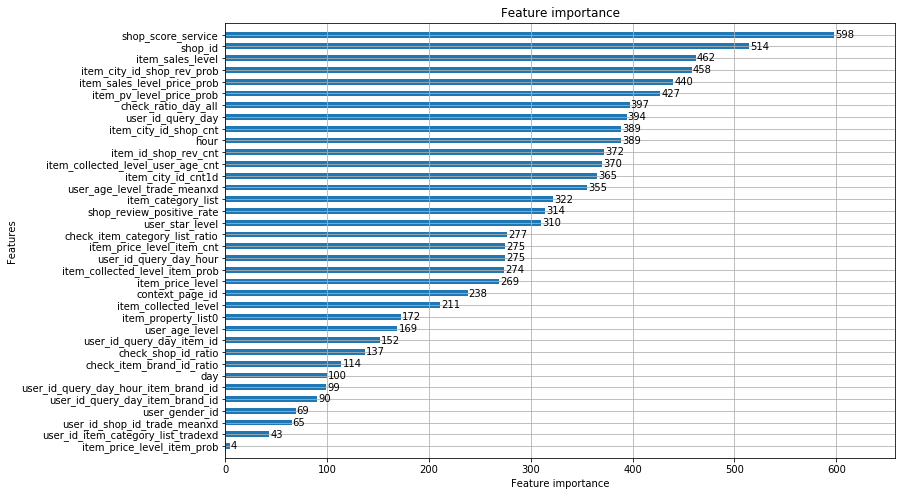

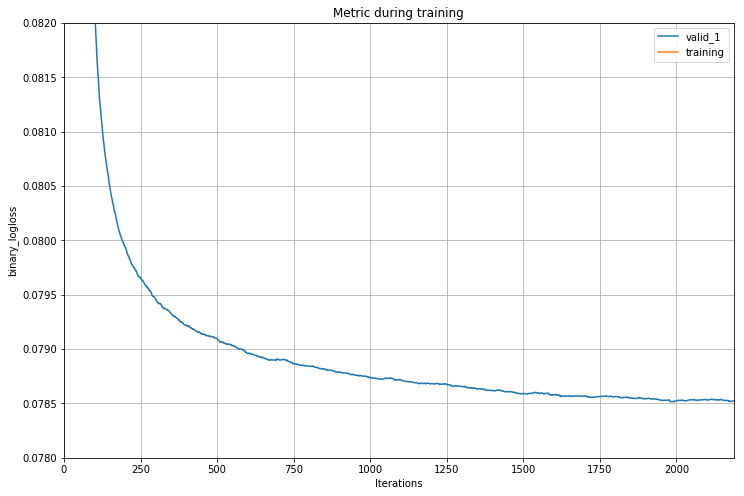

In [143]:
label = 'is_trade'
start_features =['item_category_list', 'item_price_level', 'item_sales_level', 'item_collected_level', 'user_gender_id', 'user_age_level', 'user_star_level', 'context_page_id', 'shop_review_positive_rate', 'shop_score_service', 'hour', 'day', 'user_id_query_day_hour', 'shop_id', 'user_id_query_day_item_brand_id', 'user_id_query_day_hour_item_brand_id', 'user_id_query_day', 'user_id_query_day_item_id', 'check_item_brand_id_ratio', 'check_shop_id_ratio', 'check_item_category_list_ratio', 'check_ratio_day_all', 'item_city_id_shop_cnt', 'item_city_id_shop_rev_prob', 'item_id_shop_rev_cnt', 'item_property_list0', 'item_pv_level_price_prob', 'item_collected_level_item_prob', 'item_sales_level_price_prob', 'item_city_id_cnt1d', 'item_collected_level_user_age_cnt', 'item_price_level_item_cnt', 'item_price_level_item_prob', 'user_id_shop_id_trade_meanxd', 'user_age_level_trade_meanxd', 'user_id_item_category_list_tradexd']
clf1 = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,n_estimators=20000,max_depth=3,learning_rate = 0.05, n_jobs=30)
Ttrain = df2.day < 24
Ttest =  df2.day == 24 #(df2.day > 24) & (df2.day <= 25)
clf1 = runlevel1(start_features, label, df2, Ttrain, Ttest, clf1, True)
lgbm.plot_importance(clf1,figsize=(12,8),height=0.5)
plt.show()
lgbm.plot_metric(clf1,figsize=(12,8),ylim=(0.078,0.082))
plt.show()

In [ ]:
#level2 = (clf.apply(df2[start_features]) - 2.5) / 2.5
clf2 = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,n_estimators=20000,max_depth=3,learning_rate = 0.05, n_jobs=30)
clf2 = LogisticRegression(solver =  'saga')
Ttrain = df2.day < 24 #(df2.day > 24) & (df2.day <= 23)
Ttest =  df2.day == 24
clf2 = runlevel2(level2, label, df2, Ttrain, Ttest, clf2, True)

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
enc = OneHotEncoder()
level2 = clf.apply(df2[start_features])
level2 = enc.fit_transform(level2)

In [58]:
level2.shape

(478028, 3750)

In [78]:
def get_similarity(x):
#    print(x)
    return len(set(x.predict_category_property_list) - set(x.item_property_list_list)) / len(set(x.predict_category_property_list))


In [48]:
def convertlist(x):
    return [i.split(':')[0] for i in x.split(';')]

In [6]:
df2['item_property_list_list'] = df2['item_property_list'].map(lambda x: str(x).split(';'))

In [10]:
df2['predict_category_property_list'] = df2['predict_category_property'].apply(convertlist)

In [80]:
df2['Sim'] = df2[['item_property_list_list', 'predict_category_property_list']].apply(get_similarity, axis=1)

In [82]:
np.unique(df2['Sim'])

array([1.])

In [146]:
clf1

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=3, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=20000,
        n_jobs=30, num_leaves=6, objective=None, random_state=1,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [133]:
def timeafter(df):
    n = len(df)
    check_time_difference = np.zeros((len(df),1))
    timeseries = {}
    d = df.day.max()
    for i in range(len(df)): #df.user_id[::-1]:
        #n -= 1
        u = df.user_id[n-i-1]
        try:
            check_time_difference[n-i-1] = timeseries[(u)]- df.min_series_full[n-i-1]
        except:
            check_time_difference[n-i-1] = 0
        timeseries[(u)] = df.min_series_full[n-i-1]
        if df.day[n-i-1] < d:
            d -= 1
            timeseries = {}
    df['check_min_difference_ahead'] = check_time_difference
    return df, timeseries

In [135]:
df2, dic = timeafter(df2)